**Data:**
The dataset used in this project contains **bio-signal data** and labels indicating **whether an individual is a smoker or not**. The data is stored in the **data/ directory**.

Usage
**Data Exploration**: You can examine the distributions of the features, check for missing values, and visualize relationships between variables.

**Data Preprocessing**:This step involves handling missing values, encoding categorical variables, normalizing/standardizing features, and splitting the data into training and testing sets.

**Feature Engineering:** It allows you to extract new features from the raw data to improve the model's performance.

**Model Training:**It contains code to train various machine learning models (e.g., Logistic Regression, Random Forest, SVM). You can adjust hyperparameters and select the best-performing model based on cross-validation scores.

**Model Evaluation:** It evaluate the model's performance on the test set. This script calculates metrics such as accuracy, precision, recall, and AUC-ROC and generates plots for further analysis.

**Results: **The trained model, along with evaluation results and visualizations, are saved in the results/ directory.

**Model Performance**
After training and evaluating different models, which achieved an accuracy of 73% on the test set. The model's AUC-ROC score was [AUC-ROC score], indicating good discrimination between smokers and non-smokers.

**Conclusion**
This project demonstrates the use of machine learning to predict the presence of smoking in individuals based on bio-signals. The trained model can be integrated into the company's system to assist in health assessments and personalized recommendations.

**Future Work**
Experiment with more advanced models like XGBoost or neural networks.
Collect more data to improve model robustness.
Implement real-time prediction and monitoring.


In [1]:
# importing necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Loading dataset

In [10]:
data= pd.read_csv("smoking.csv")
data.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [16]:
data.drop(columns=["oral","ID"],inplace=True)

In [13]:
#checking the shape of data and data types

In [17]:
data.shape

(55692, 25)

In [18]:
data.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,76.004830,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,9.679278,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,146.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [19]:
#checking the missing value

In [20]:
pd.isnull(data).sum()

,0
gender,0
age,0
height(cm),0
weight(kg),0
waist(cm),0
eyesight(left),0
eyesight(right),0
hearing(left),0
hearing(right),0
systolic,0


In [21]:
#Data visulaization

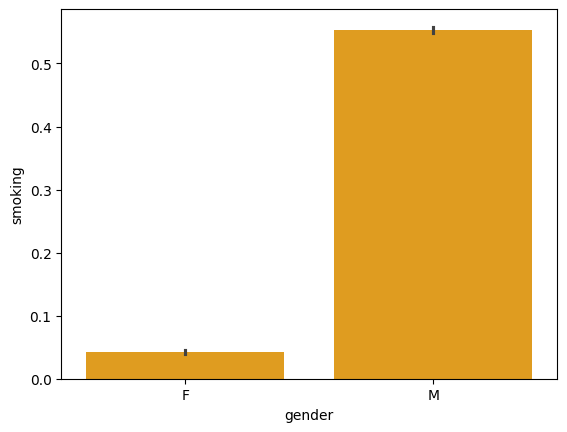

In [26]:
sns.barplot(x=data["gender"],y=data["smoking"],color="orange")
plt.show()

In [24]:
#we can see most of the smokers are men

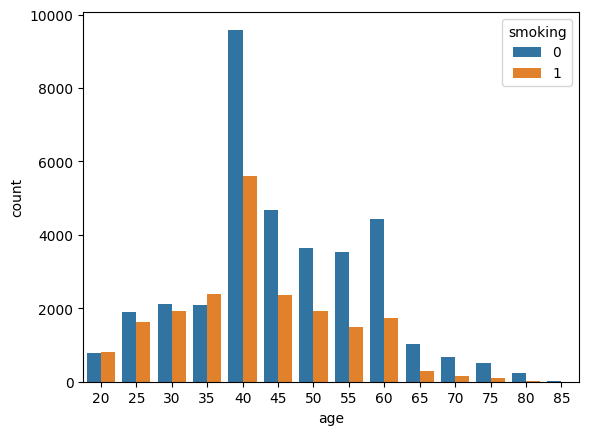

In [27]:
sns.countplot(x=data["age"],hue=data["smoking"])
plt.show()

In [29]:
# most numbers of smoker are having age of 40

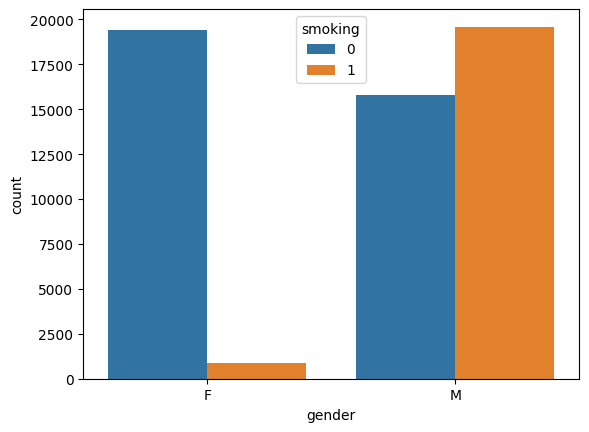

In [28]:
sns.countplot(x=data["gender"],hue=data["smoking"])
plt.show()

In [ ]:
# representaion of columns using boxplot to detect the number of outliers.

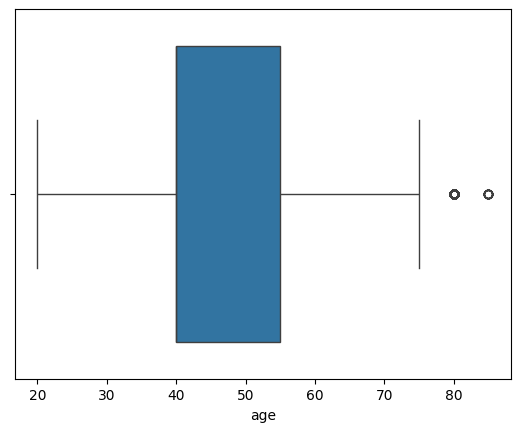

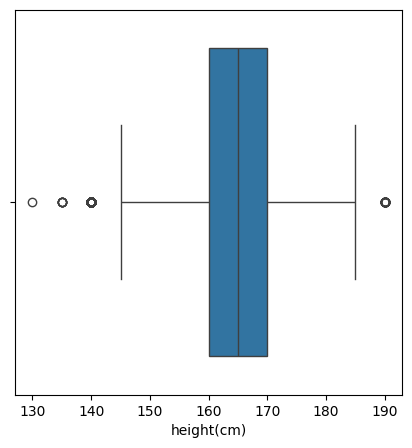

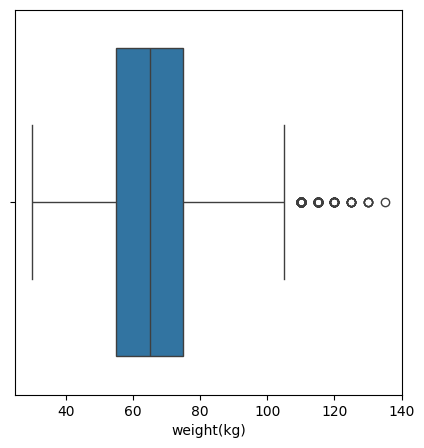

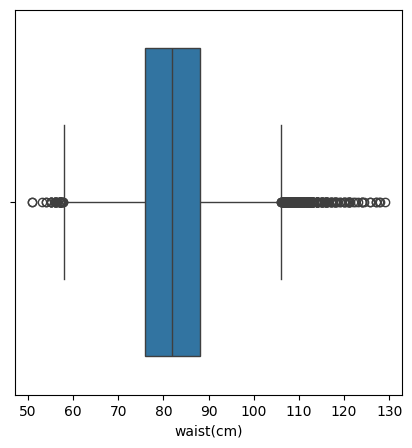

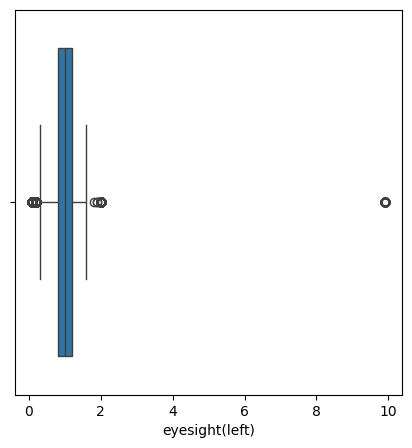

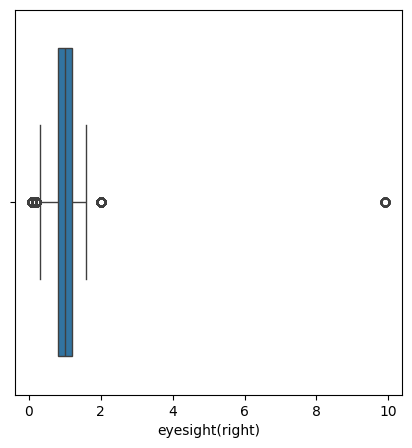

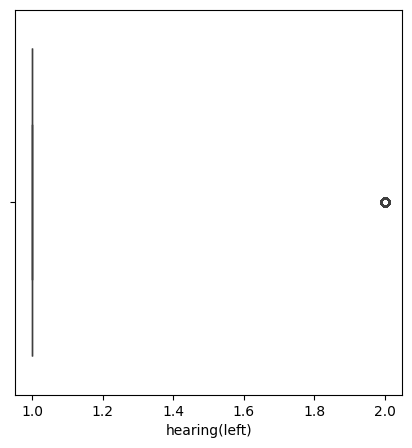

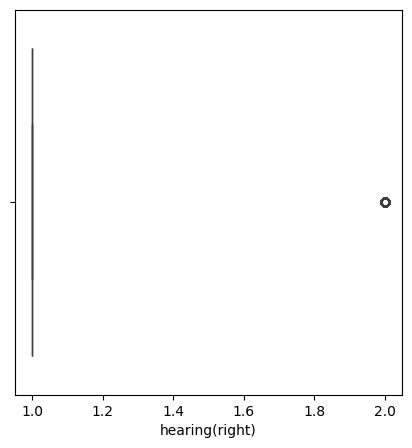

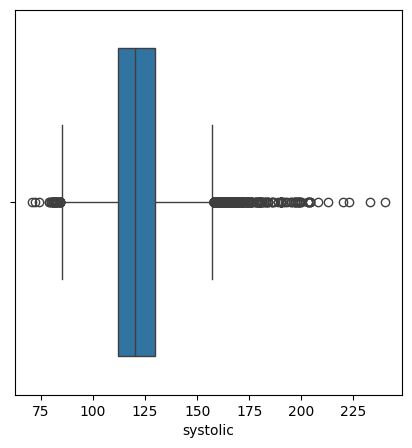

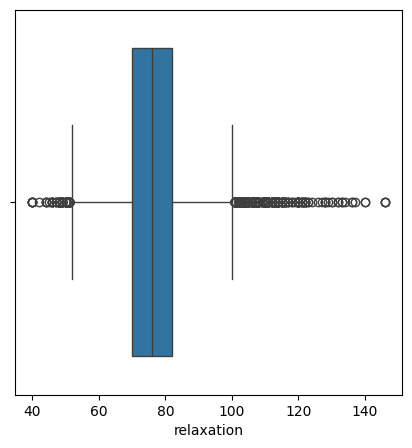

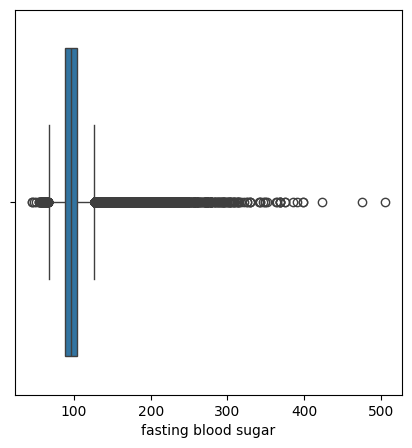

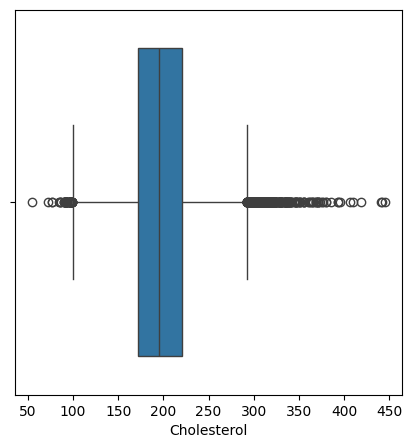

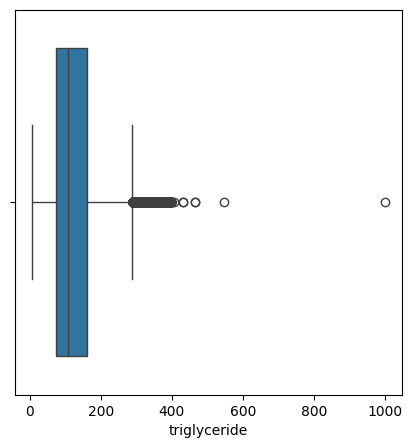

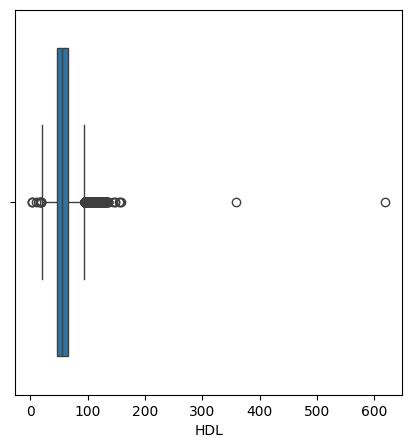

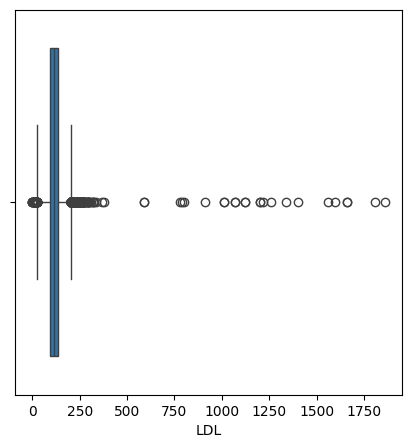

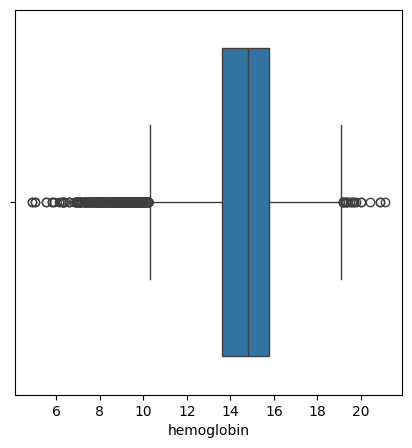

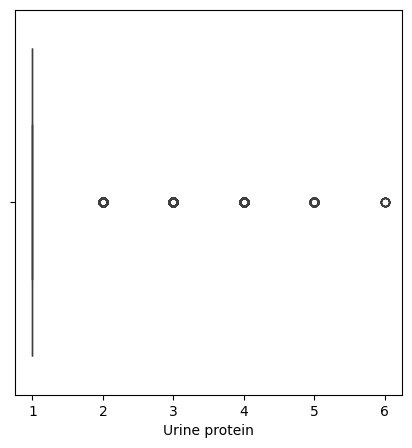

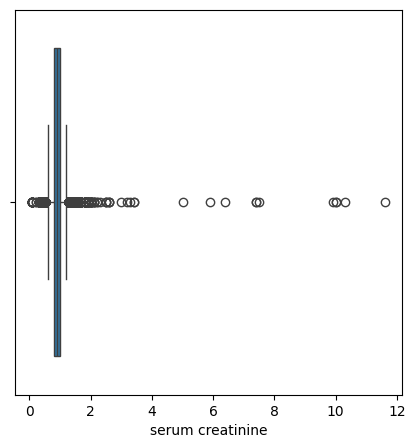

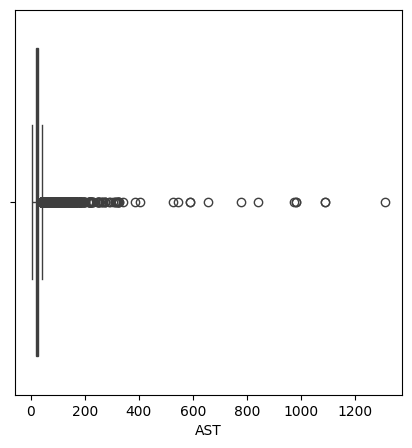

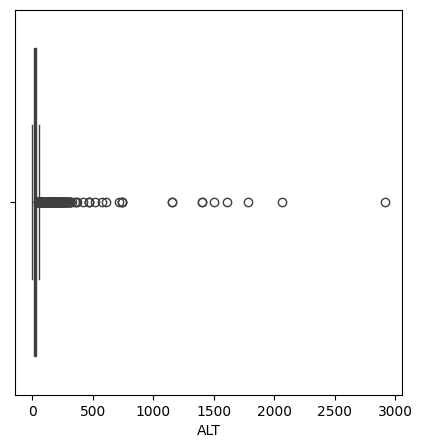

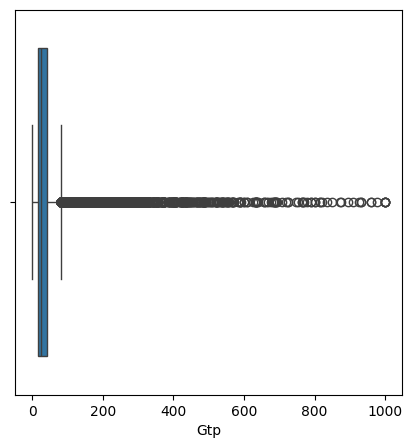

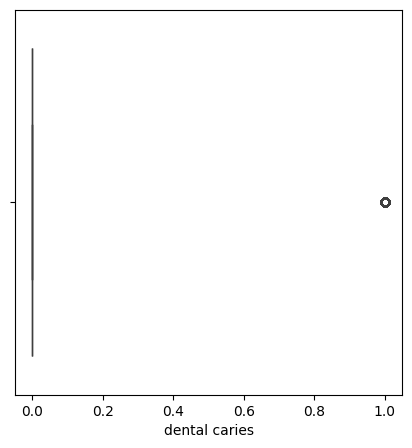

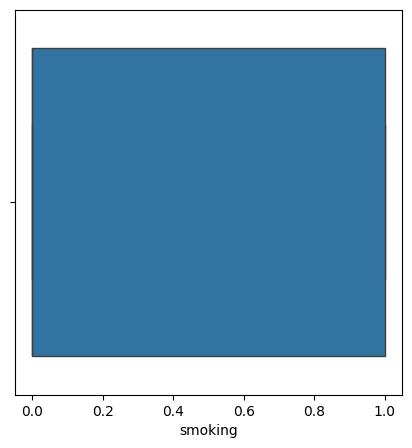

<Figure size 500x500 with 0 Axes>

In [32]:
for i in data.columns:
  if(data[i].dtype=="int64" or data[i].dtype=="float64"):
    sns.boxplot(x=data[i])
    plt.show()
    plt.figure(figsize=(5,5))

In [33]:
#Data Cleaning

In [36]:
data.dtypes


,0
gender,object
age,int64
height(cm),int64
weight(kg),int64
waist(cm),float64
eyesight(left),float64
eyesight(right),float64
hearing(left),float64
hearing(right),float64
systolic,float64


In [37]:
# performing one hot encodeing for categorical data

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["gender"]=le.fit_transform(data["gender"])
data["tartar"]=le.fit_transform(data["tartar"])

In [41]:
data.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,1,0
1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,1,0
2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,1
3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,1,0
4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0


In [72]:
#Selecting important features
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

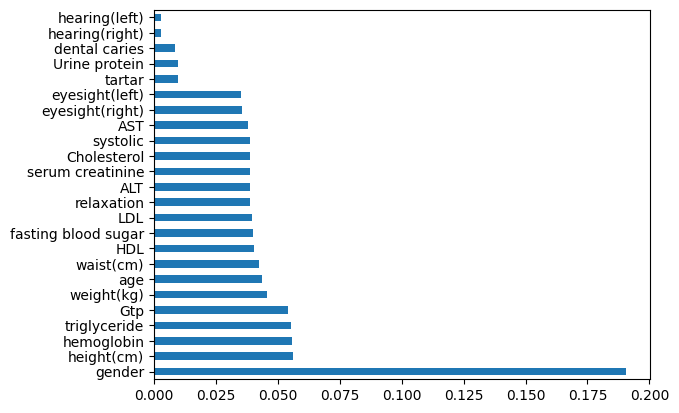

In [74]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)
df=pd.Series(model.feature_importances_,index=x.columns)
df.nlargest(24).plot(kind="barh")
plt.show()



In [68]:
# keeping only important features

In [69]:
data.columns


Index(['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'tartar',
       'smoking'],
      dtype='object')

In [81]:
X=data[["age","gender","height(cm)","weight(kg)","waist(cm)","systolic","relaxation","fasting blood sugar","Cholesterol","triglyceride","HDL","LDL","hemoglobin"]]
X

,age,gender,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin
0,40,0,155,60,81.3,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9
1,40,0,160,60,81.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7
2,55,1,170,60,80.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8
3,40,1,165,70,88.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7
4,40,0,155,60,86.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,40,0,170,65,75.0,110.0,68.0,89.0,213.0,99.0,75.0,118.0,12.3
55688,45,0,160,50,70.0,101.0,62.0,89.0,166.0,69.0,73.0,79.0,14.0
55689,55,0,160,50,68.5,117.0,72.0,88.0,158.0,77.0,79.0,63.0,12.4
55690,60,1,165,60,78.0,133.0,76.0,107.0,210.0,79.0,48.0,146.0,14.4


In [79]:
y=data["smoking"]

In [80]:
y

,smoking
0,0
1,0
2,1
3,0
4,0
...,...
55687,0
55688,0
55689,0
55690,0


In [82]:
#Spliting the data into training and testing sets

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [84]:
X.shape

(55692, 13)

In [85]:
y.shape

(55692,)

In [ ]:
#Logistic Regression

In [86]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score

In [89]:
LR=LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [90]:
y_pred=LR.predict(X_test)

In [91]:
LR_report=classification_report(y_test,y_pred)
print(LR_report)

              precision    recall  f1-score   support

           0       0.81      0.74      0.77      7076
           1       0.61      0.70      0.65      4063

    accuracy                           0.73     11139
   macro avg       0.71      0.72      0.71     11139
weighted avg       0.74      0.73      0.73     11139



In [92]:
#Desicion Tree

In [93]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [95]:
y_pred=DT.predict(X_test)
DT_report=classification_report(y_test,y_pred)
print(DT_report)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      7076
           1       0.69      0.69      0.69      4063

    accuracy                           0.77     11139
   macro avg       0.76      0.76      0.76     11139
weighted avg       0.77      0.77      0.77     11139



In [ ]:
#Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.815692611545022

In [97]:
RF_report=classification_report(y_test,y_pred)
print(RF_report)

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      7076
           1       0.74      0.77      0.76      4063

    accuracy                           0.82     11139
   macro avg       0.80      0.81      0.81     11139
weighted avg       0.82      0.82      0.82     11139



In [99]:
#Bagging Algorithm – Bagging Classifier

In [100]:
from sklearn.ensemble import BaggingClassifier
BC=BaggingClassifier()
BC.fit(X_train,y_train)
y_pred=BC.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)
BC_report=classification_report(y_test,y_pred)
print(BC_report)


              precision    recall  f1-score   support

           0       0.82      0.86      0.84      7076
           1       0.74      0.68      0.71      4063

    accuracy                           0.79     11139
   macro avg       0.78      0.77      0.77     11139
weighted avg       0.79      0.79      0.79     11139

